Original samples: 166633
Samples: 652


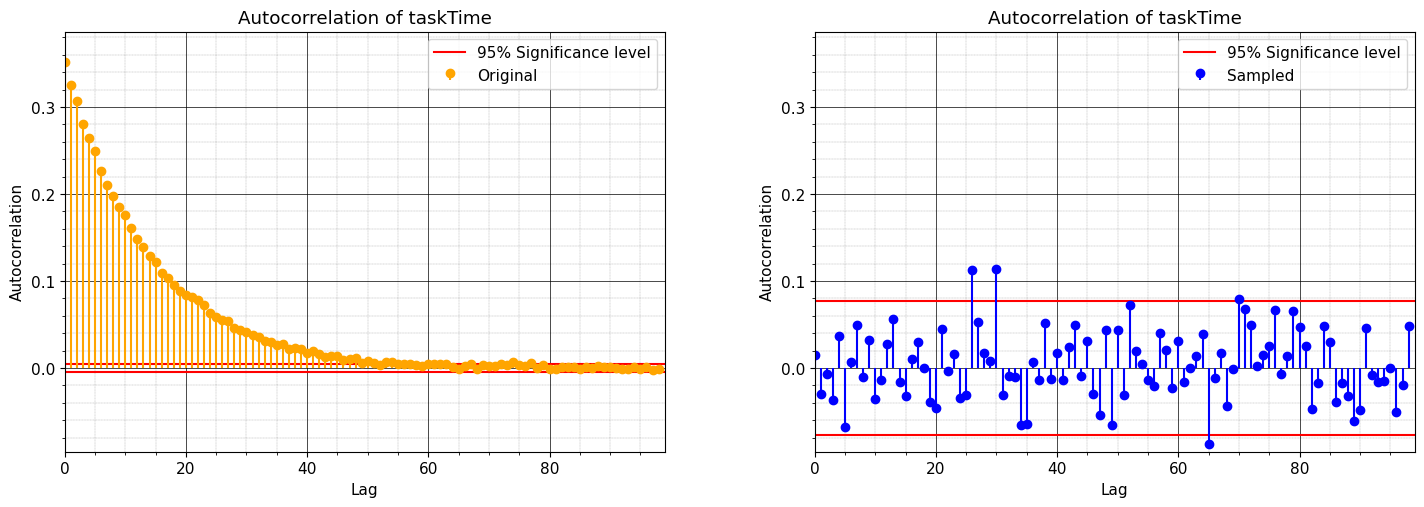

In [1]:
import sys
import matplotlib
import matplotlib.pyplot as plt
import json
import random
from scipy.stats import norm

random.seed(42)

if len(sys.argv) != 3 and 0:
    print('Usage: python autocorrelation.py <json_file> <stat>')
    sys.exit(1)

#json_file = sys.argv[1]
#stat = sys.argv[2]

json_file = "../simulations/results/Autocorrelation_true_10.json"
stat = "taskTimeStat:vector"

f = open(json_file, 'r')
data = json.load(f)

original_samples = []

# dovrebbe essere una sola ripetizione
for repetition in data:
    for vector in data[repetition]['vectors']:
        if vector['name'] != stat:
            continue

        original_samples = vector['value']
        break

p = 1/256
original_samples = original_samples[:len(original_samples)//5]
samples = []
for s in original_samples:
    if random.random() < p:
        samples.append(s)

print('Original samples:', len(original_samples))
print('Samples:', len(samples))

autocorrelation = []

X_avg = sum(samples) / len(samples)
S2 = sum([(x - X_avg) ** 2 for x in samples]) / (len(samples) - 1)

for i in range(1, min(100, len(samples)//3)):
    sum_ = 0
    for j in range(len(samples) - i):
        sum_ += (samples[j] - X_avg) * (samples[j + i] - X_avg)
    autocorrelation.append(sum_ / ((len(samples) - i) * S2))

original_autocorrelation = []
original_X_avg = sum(original_samples) / len(original_samples)
original_S2 = sum([(x - original_X_avg) ** 2 for x in original_samples]) / (len(original_samples) - 1)
for i in range(1, min(100, len(samples)//3)):
    sum_ = 0
    for j in range(len(original_samples) - i):
        sum_ += (original_samples[j] - original_X_avg) * (original_samples[j + i] - original_X_avg)
    original_autocorrelation.append(sum_ / ((len(original_samples) - i) * original_S2))

# confidence
alpha = 0.05
# get z_alpha/2 value for 95% confidence on a gaussian distribution, based on alpha
z = norm.ppf(alpha / 2)

conf_sampl = z / (len(samples) ** 0.5)
conf_orig = z / (len(original_samples) ** 0.5)



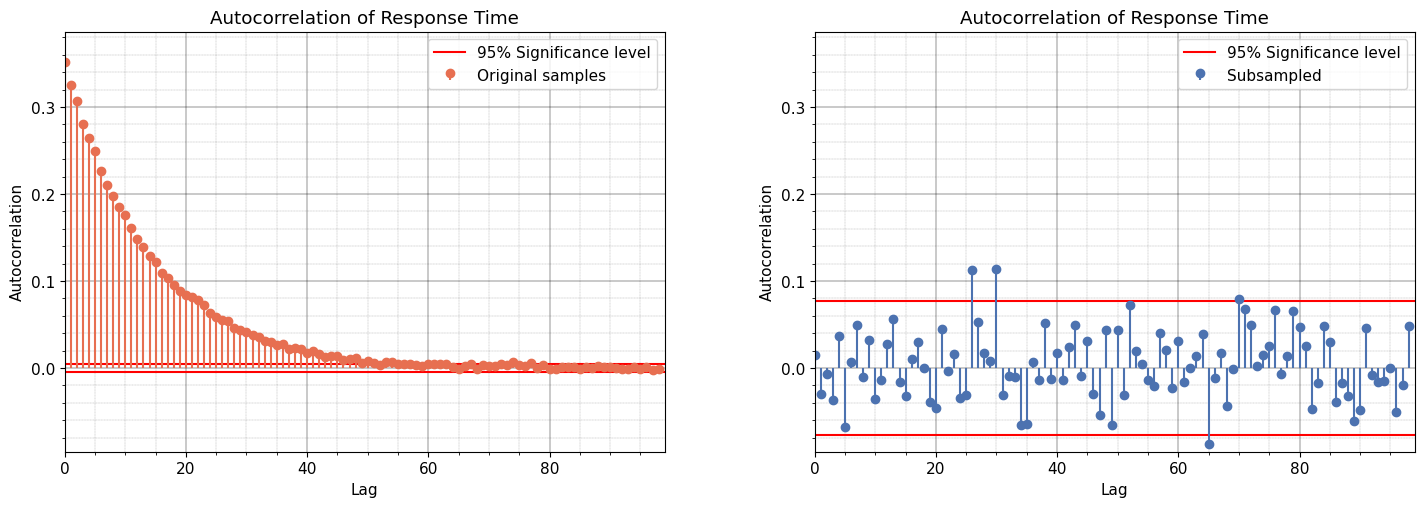

In [9]:


matplotlib.rcParams.update({'font.size': 11})


# make two plots, one for the original and one for the sampled one next to each other
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# plot original on the left
# confidence interval
confidence_interval1_orig = [conf_orig for i in range(len(autocorrelation)+1)]
confidence_interval2_orig = [-conf_orig for i in range(len(autocorrelation)+1)]
ax[0].plot(confidence_interval1_orig, 'r', label=f'{int((1-alpha)*100)}% Significance level')
ax[0].plot(confidence_interval2_orig, 'r')
ax[0].stem(original_autocorrelation, basefmt=" ", linefmt='#e76f51', label='Original samples')
ax[0].set_xlabel('Lag')
ax[0].set_ylabel('Autocorrelation')
ax[0].set_title('Autocorrelation of Response Time')
ax[0].grid()
ax[0].minorticks_on()
ax[0].grid(which='major', linestyle='-', linewidth='0.3', color='black')
ax[0].grid(which='minor', linestyle=':', linewidth='0.2', color='black')
ax[0].set_xlim(0, len(original_autocorrelation))
# add legend
ax[0].legend()

# plot sampled on the right
# confidence interval
confidence_interval1 = [conf_sampl for i in range(len(autocorrelation)+1)]
confidence_interval2 = [-conf_sampl for i in range(len(autocorrelation)+1)]
ax[1].plot(confidence_interval1, 'r', label=f'{int((1-alpha)*100)}% Significance level')
ax[1].plot(confidence_interval2, 'r')
ax[1].stem(autocorrelation, basefmt=" ", linefmt='#4c72b0', label='Subsampled')
ax[1].set_xlabel('Lag')
ax[1].set_ylabel('Autocorrelation')
ax[1].set_title('Autocorrelation of Response Time')
ax[1].grid()
ax[1].minorticks_on()
ax[1].grid(which='major', linestyle='-', linewidth='0.3', color='black')
ax[1].grid(which='minor', linestyle=':', linewidth='0.2', color='black')
ax[1].set_xlim(0, len(autocorrelation))
# add legend
ax[1].legend()

# set y limits to the bigger autocorrelation
ax[0].set_ylim(min(min(original_autocorrelation), min(autocorrelation))*1.1, max(max(original_autocorrelation), max(autocorrelation))*1.1)
ax[1].set_ylim(min(min(original_autocorrelation), min(autocorrelation))*1.1, max(max(original_autocorrelation), max(autocorrelation))*1.1)

# remove white space and make plot start to the left and end to the right
plt.subplots_adjust(left=0.08, right=0.98, top=0.94, bottom=0.1, wspace=0.25)

plt.savefig('Autocorrelation_true_10.pdf', format='pdf')
plt.show()

